In [ ]:
import os

os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import os
import warnings
import logging
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
from IPython.display import display
import random

# Suppress future warnings and reduce extra logging messages
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("diffusers").setLevel(logging.ERROR)


In [ ]:
def generate_art(subject: str, style: str, output_path: str = "outputs/generated_art.png",
                 guidance_scale: float = 7.5, num_inference_steps: int = 50):
    """
    Generates AI art based on a subject and a style.

    Parameters:
      subject (str): The main subject (e.g., "a portrait", "a landscape").
      style (str): The artistic style (e.g., "Renaissance", "cyberpunk", "minimalist").
      output_path (str): Where to save the generated image.
      guidance_scale (float): How strictly the model should follow the prompt.
      num_inference_steps (int): Number of denoising steps.
    """
    # Combine subject and style into a prompt.
    prompt = f"{subject} in {style} style, highly detailed, high quality, digital art"
    # Generate a random seed.
    seed = random.randint(0, 2**32 - 1)
    if torch.cuda.is_available():
        generator = torch.Generator("cuda").manual_seed(seed)
    else:
        generator = torch.Generator().manual_seed(seed)

    print(f"Using prompt: {prompt}")
    print(f"Random seed: {seed}")

    model_id = "runwayml/stable-diffusion-v1-5"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Load the text-to-image pipeline.
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16 if device=="cuda" else torch.float32)
    pipe = pipe.to(device)

    # Generate the image.
    result = pipe(
        prompt=prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        generator=generator
    )
    image = result.images[0]

    # Ensure the output directory exists.
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    image.save(output_path)
    print(f"\nGenerated art saved as: {output_path}")

    # Display the generated image inline.
    display(image)


In [ ]:
def main():
    print("Welcome to the AI Art Generator!")
    subject = input("Enter the subject (e.g., 'a portrait', 'a landscape', 'a cityscape'): ").strip()
    style = input("Enter the style (e.g., 'Renaissance', 'cyberpunk', 'minimalist'): ").strip()

    try:
        guidance_input = input("Enter guidance scale [default 7.5]: ").strip()
        guidance_scale = float(guidance_input) if guidance_input else 7.5
    except ValueError:
        print("Invalid guidance scale input; using default 7.5.")
        guidance_scale = 7.5

    try:
        steps_input = input("Enter number of inference steps [default 50]: ").strip()
        num_inference_steps = int(steps_input) if steps_input else 50
    except ValueError:
        print("Invalid step count; using default 50.")
        num_inference_steps = 50

    output_path = input("Enter the output filename [default outputs/generated_art.png]: ").strip()
    if not output_path:
        output_path = "outputs/generated_art.png"

    generate_art(subject, style, output_path, guidance_scale, num_inference_steps)
    print("Process complete!")

Welcome to the AI Art Generator!
Enter the subject (e.g., 'a portrait', 'a landscape', 'a cityscape'): city in sky
Enter the style (e.g., 'Renaissance', 'cyberpunk', 'minimalist'): cyberpunk 
Enter guidance scale [default 7.5]: 
Enter number of inference steps [default 50]: 
Enter the output filename [default outputs/generated_art.png]: 
Using prompt: city in sky in cyberpunk style, highly detailed, high quality, digital art
Random seed: 733278195


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]


Generated art saved as: outputs/generated_art.png


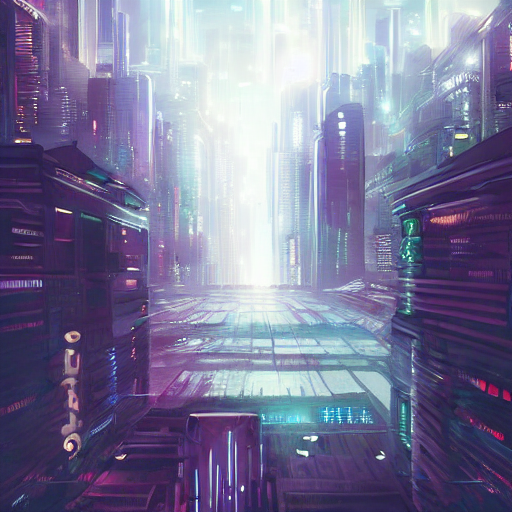

Process complete!


In [ ]:
if __name__ == "__main__":
    main()